# Reading a NetCDF file using xarray


NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. It is also a community standard for sharing scientific data. Please go to https://www.unidata.ucar.edu/software/netcdf/ for more information. </br>


### xarray </br>
N-D labeled arrays and datasets in Python </br>

Xarray is a Python package that makes working with labelled multi-dimensional arrays simple, efficient, and fun!
More information in http://xarray.pydata.org/en/stable/index.html .

#### DataArray </br>
xarray.DataArray is an implementation of a labelled, multi-dimensional array for a single variable: </br>
values: a numpy.ndarray holding the array’s values </br>
dims: dimension names for each axis (e.g., ('lat', 'lon', 'z', 'time')) </br>
coords: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dim arrays of numbers, DateTime objects, or strings) </br>
attrs: an OrderedDict to hold arbitrary metadata (attributes) </br>
#### DataSet </br>
xarray.DataSet is a collection of DataArrays. Each NetCDF file contains a DataSet. </br>

### Data Import

Use open_dataset or open_mfdataset to read a single or multiple NetCDF files, and store it in a DataSet called DS.

Let's read the latent heat flux data again. 

First, let's go over how to read the NOAA data. All the available data are listed here:
https://psl.noaa.gov/data/gridded/

We will use opendap to read the remote data. 

Some instruction is here (somewhat difficulty to follow):
https://psl.noaa.gov/data/gridded_help/using_dods.html
    

You have to specify where you can find the data. You have to specify </br>
OPeNDAP server hostname </br>
OPeNDAP server infix </br>
Path to dataset (a netCDF file in this case)</br>
#### For the evaporation data:  
OPeNDAP server hostname: https://psl.noaa.gov/ </br>
OPeNDAP server infix: thredds/dodsC/ </br>
Path to dataset: 
Datasets/ncep.reanalysis2.derived/gaussian_grid/lhtfl.sfc.mon.mean.nc 
</br>

For other dataset, please take a look at the catalog, and only modify the path to dataset part. </br>
You can read this file and save it as ds1 in the following way:



In [5]:
import xarray as xr
file1='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis2.derived/gaussian_grid/lhtfl.sfc.mon.mean.nc'

ds1=xr.open_dataset(file1)
print(ds1)
lh=ds1.lhtfl
ds1.close()

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 505)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    lhtfl      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           Monthly NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/da

In [6]:
# this automatically closes the dataset after use (same as above)
with xr.open_dataset(file1) as ds1:      
    print(ds1)
    lh=ds1.lhtfl

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 505)
Coordinates:
  * lat        (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon        (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-01-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) datetime64[ns] ...
    lhtfl      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           Monthly NCEP/DOE Reanalysis 2
    comments:                        Data is from \nNCEP/DOE AMIP-II Reanalys...
    platform:                        Model
    source:                          NCEP/DOE AMIP-II Reanalysis (Reanalysis-...
    institution:                     National Centers for Environmental Predi...
    dataset_title:                   NCEP-DOE AMIP-II Reanalysis
    References:                      https://www.psl.noaa.gov/da

### Exercise
Now let's read the recent surface temperature data. Find the dataset from the Catalog. It is called NCEP/NCAR Reanalysis.
Please find the path to the data from here:
    https://psl.noaa.gov/data/gridded/  </br>
The variable is called air in the surface directory, and let's look at the values for year 2021 ( air.sig995.2021.nc).

In [11]:
file2='https://psl.noaa.gov/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2021.nc'
with xr.open_dataset(file2) as ds2:      
    print(ds2)
    ta=ds2.air

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 156)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2021-01-01 ... 2021-02-08T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2014)
    history:                         created 2017/12 by Hoop (netCDF2.3)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    dataset_title:                   NCEP-NCAR Reanalysis 1
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    DODS_EXTRA.Unlimited_Dimension:  time


### Make a plot

To be able to make a contour plot, the data have to be 2D. ta is a 3D variable, so we should specify one dimention. Let's specify time and plot for the last time step.

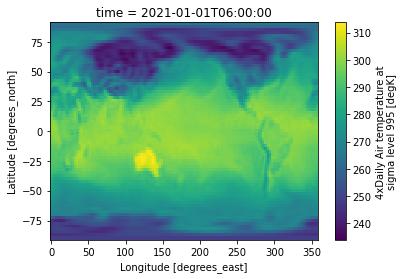

In [13]:
ta.isel(time=1).plot()  # isel is used to specify the index.

### Exercise
Make a plot for the fifth time step.

Let's make a plot for February 1st 00 UTC. To do that, let's first figure out how the time axis is written.

In [15]:
print(ta.time)

<xarray.DataArray 'time' (time: 156)>
array(['2021-01-01T00:00:00.000000000', '2021-01-01T06:00:00.000000000',
       '2021-01-01T12:00:00.000000000', '2021-01-01T18:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-02T06:00:00.000000000',
       '2021-01-02T12:00:00.000000000', '2021-01-02T18:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-03T06:00:00.000000000',
       '2021-01-03T12:00:00.000000000', '2021-01-03T18:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-04T06:00:00.000000000',
       '2021-01-04T12:00:00.000000000', '2021-01-04T18:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-05T06:00:00.000000000',
       '2021-01-05T12:00:00.000000000', '2021-01-05T18:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-06T06:00:00.000000000',
       '2021-01-06T12:00:00.000000000', '2021-01-06T18:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-07T06:00:00.000000000',
       '2021-

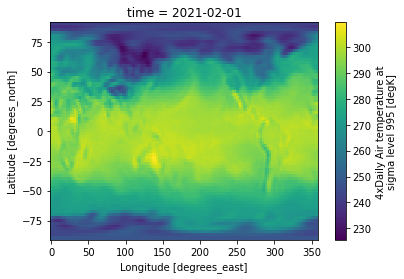

In [21]:
ta.sel(time='2021-02-01T00:00').plot()  # sel is used to specify the axis values

### Exercise
Make a plot for February 7th 18:00 UTC.

We could specify two dimensions and make a line plot. Let's make a plot for a grid point closest to providence. 

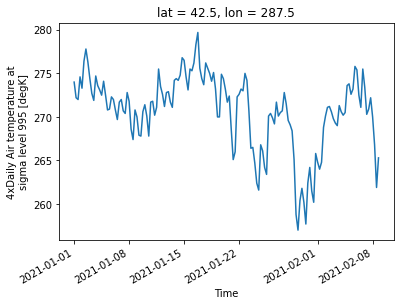

In [24]:
#Plot temperature of a point in January
lat_pvd=41.8
lon_pvd=-71.4+360
ta.sel(lat=lat_pvd,lon=lon_pvd , method='nearest').plot()

### Exercise
Choose a location that you'd like to look at, and make a line plot.